***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* 8. Calibration 
    * Previous: [8.2 1GC calibration: point source, derive bandpass gains]()
    * Next: [8.4 ]()

***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import section specific modules:

In [2]:
from IPython.display import Image

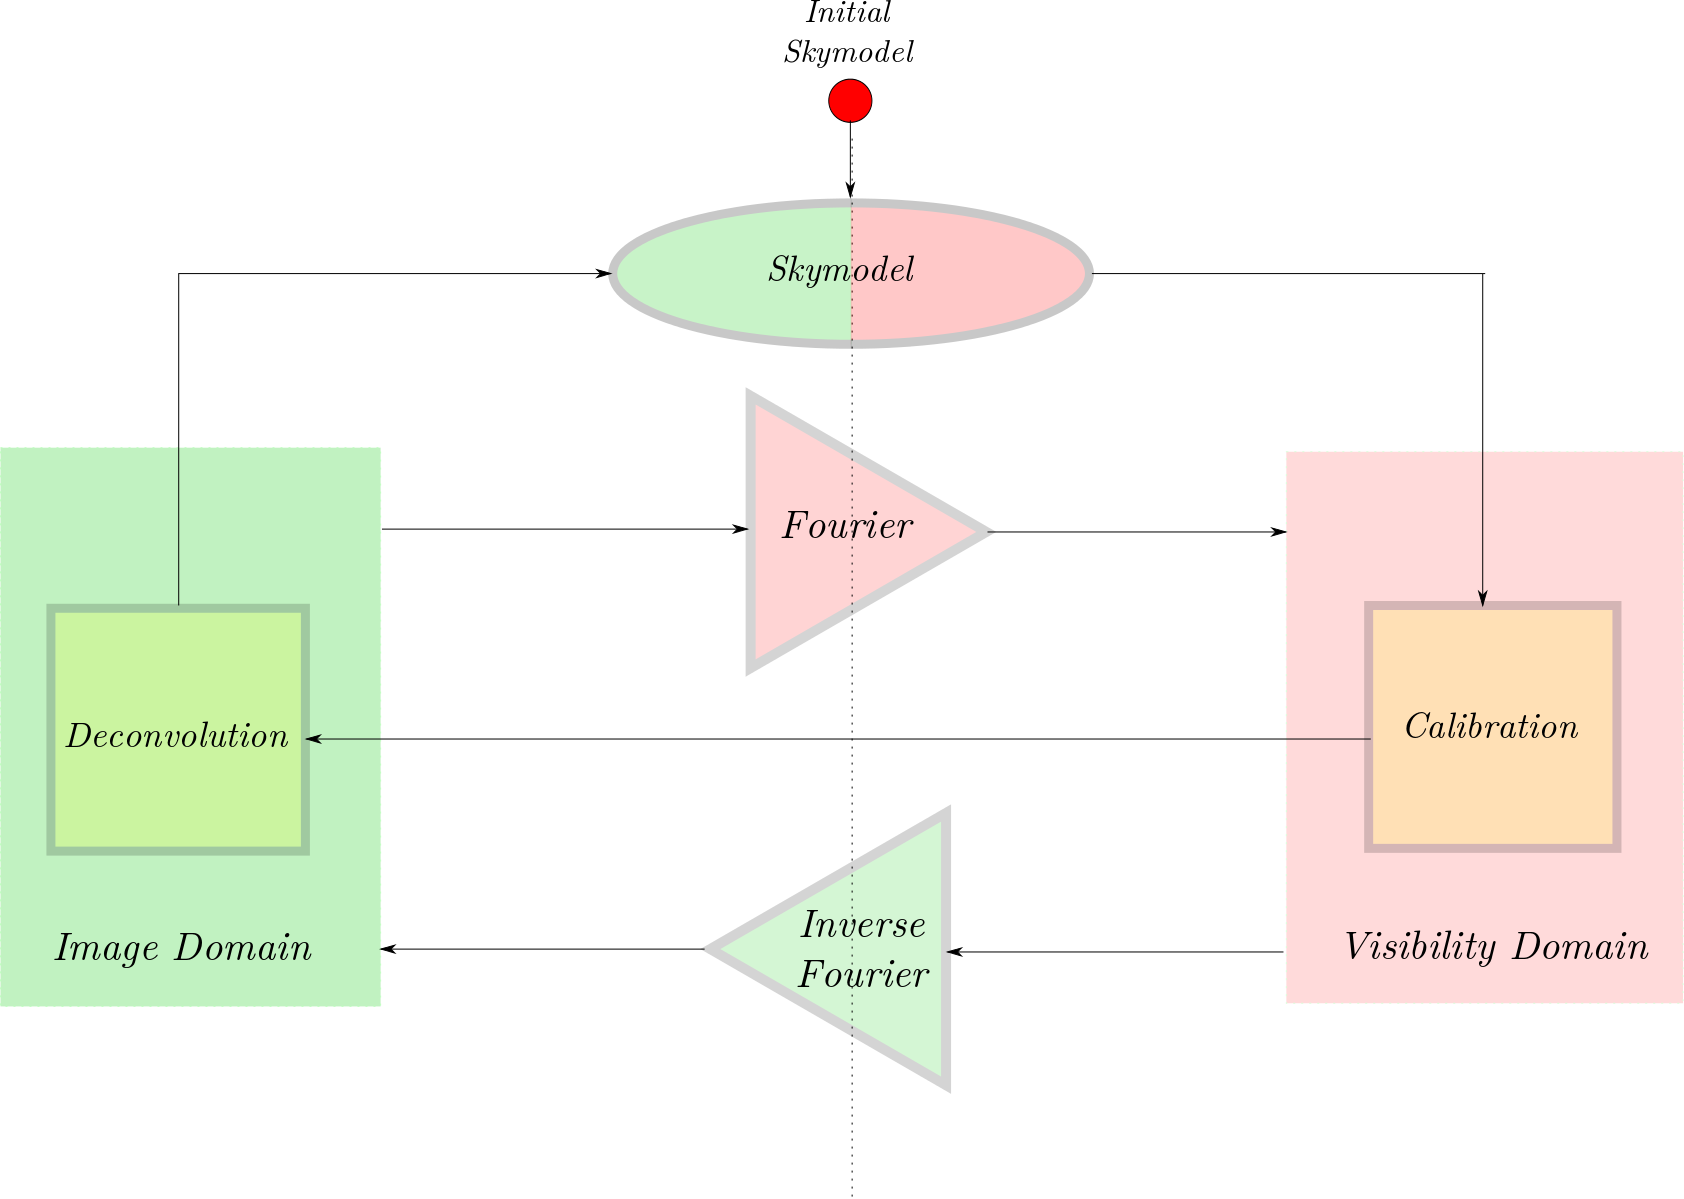

In [6]:
Image(filename='figures/Selfcal.png', width=600, height=100)